In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir('D:\Python')

In [4]:
os.getcwd()

'D:\\Python'

## 1. EDA

### Importing data (data) and then creating copy (abtest).

In [5]:
data = pd.read_csv('abtest.csv')

In [6]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
abtest = data.copy()

### Data Overview

In [8]:
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [9]:
abtest.shape

(100, 6)

In [10]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Fixing Data Types

In [11]:
abtest['group'] = abtest['group'].astype('category')
abtest['landing_page'] = abtest['landing_page'].astype('category')
abtest['converted'] = abtest['converted'].astype('category')
abtest['language_preferred'] = abtest['language_preferred'].astype('category')

In [12]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


### Check for Missing Values

In [13]:
abtest.isnull().sum().sort_values(ascending=True)

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Five Point Summary

In [14]:
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [15]:
abtest['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [16]:
abtest['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [17]:
abtest['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [18]:
abtest['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

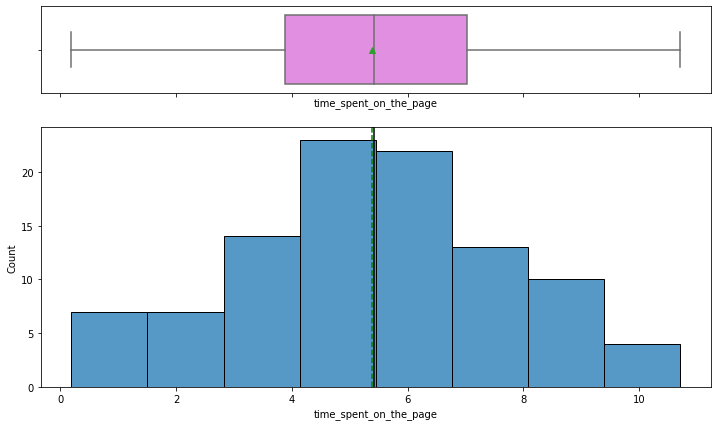

In [20]:
histogram_boxplot(abtest,"time_spent_on_the_page")

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

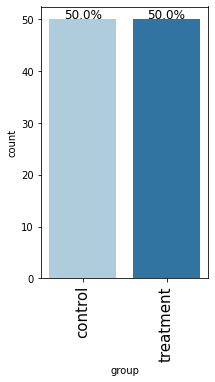

In [22]:
labeled_barplot(abtest,'group',perc = True)

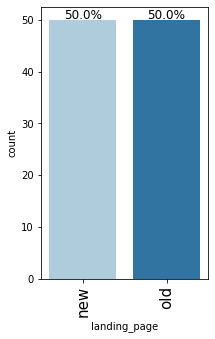

In [23]:
labeled_barplot(abtest,'landing_page',perc = True)

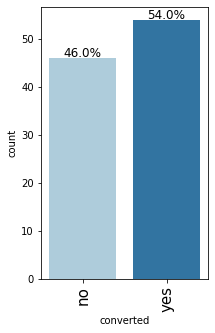

In [24]:
labeled_barplot(abtest,'converted',perc = True)

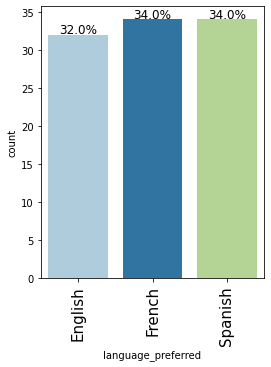

In [25]:
labeled_barplot(abtest,'language_preferred',perc = True)

### Bivariate Analysis

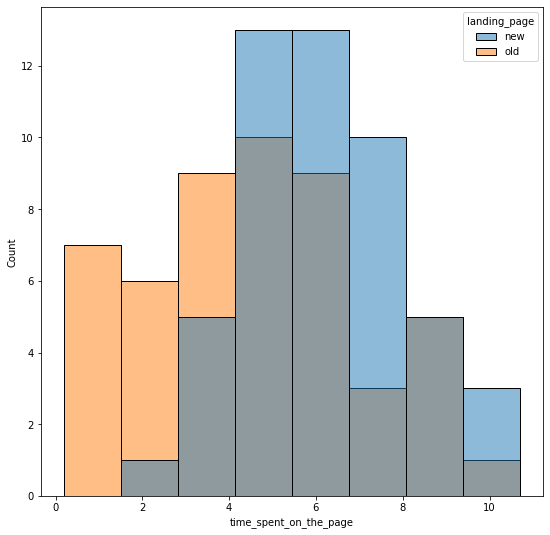

In [26]:
plt.figure(figsize=(9, 9))
sns.histplot(data = abtest, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

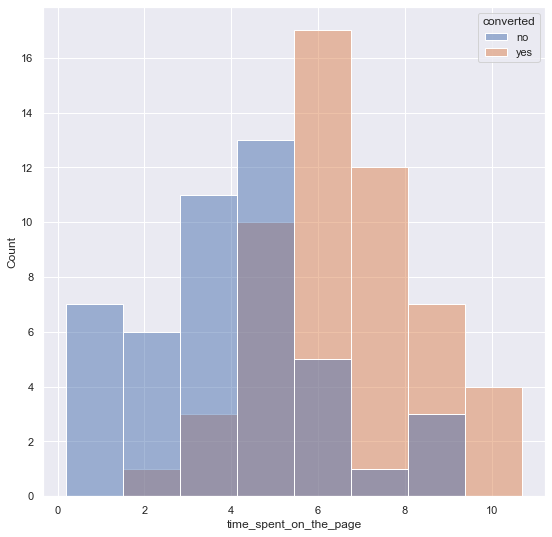

In [78]:
plt.figure(figsize=(9, 9))
sns.histplot(data = abtest, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

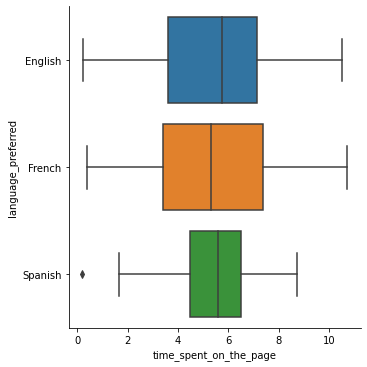

In [51]:
sns.catplot(x = "time_spent_on_the_page", y = "language_preferred", kind = "box", data = abtest)

## 2. Do users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

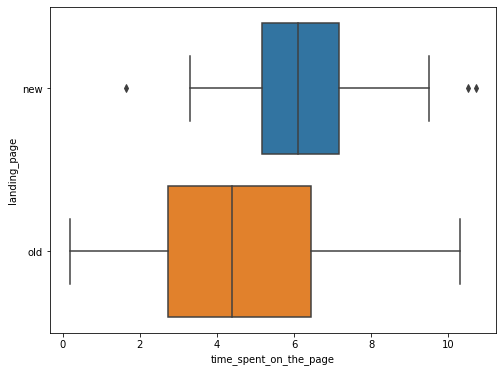

In [53]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'time_spent_on_the_page', y = 'landing_page', data = abtest)
plt.show()

### Step 1. Define Hypotheses

Null Hypothesis: The users spend the same amount of time on the new landing page as the old landing page.

Alternative Hypothesis: The users spend more time on the new landing page than the old landing page.

### Step 2. Select Appropriate Test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information we will be performing an **2-sample t-test**.

### Step 3. Decide Significance Level

As given in the problem statement, we select α = 0.05.

### Step 4. Collect and Prepare Data

In [30]:
# create subsetted data frame for new landing page users 
time_spent_new = abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old = abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page']

In [31]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


Based on the sample standard deviations of the two groups, it is assumed that the population standard deviations is unequal.

### Step 5. Calculate the P-value

In [32]:
# complete the code to import the required function
from scipy.stats import ttest_ind 

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


In [33]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7. Draw Inference

**Due to the low p-value, we can conclude based on our data samples that more people spend time on the new landing page than the old landing page.**

## 3. Is the conversion rate (proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

<AxesSubplot:xlabel='landing_page', ylabel='count'>

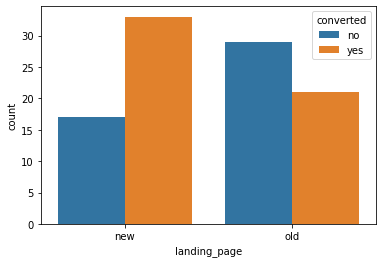

In [54]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
#plt.figure(figsize=(8,6))
#sns.boxplot(x = 'time_spent_on_the_page', y = abtest.mean(,  data = abtest)
#plt.show()
            
sns.countplot(x = 'landing_page', hue = 'converted', data = abtest)

### Step 1. Define Hypotheses

Null Hypothesis: The conversion rate for the new page is less than or equal to the conversion rate for the old page.

Alternative Hypothesis: The conversion rate for the new page is greater than the conversion rate for the old page.

### Step 2. Select Appropriate Test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information we will use the **2-sample z-test for proportions**.

### Step 3. Decide Significance Level

As given in the problem statement, we select α = 0.05.

### Step 4. Collect and Prepare Data

In [35]:
# calculate the number of converted users in the treatment group
new_converted = abtest[abtest['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = abtest[abtest['group'] == 'control']['converted'].value_counts()['yes']

n_control = abtest.group.value_counts()['control'] # total number of users in the control group
n_treatment = abtest.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively.'.format(n_control, n_treatment ))
print('The number of converted users from new and old pages are {0} and {1} respectively.'.format(new_converted, old_converted))

The numbers of users served the new and old pages are 50 and 50 respectively.
The number of converted users from new and old pages are 33 and 21 respectively.


In [36]:
#set the number of conversions from both groups
conversions_count = np.array([new_converted, old_converted])

#set the sample sizes
nobs = np.array([50, 50])

### Step 5. Calculate P-value

In [37]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest   

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest(conversions_count, nobs, alternative = 'larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6. Compare the P-value with α

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7. Draw Inference

**Because we are rejecting the Null Hypothesis, we conclude that the new page has a greater conversion rate for the old page.**

## 4. Are the conversion rate and preferred language independent or related?

### Perform Visual Analysis

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

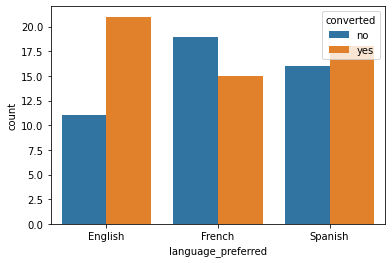

In [55]:
#### plot something here
sns.countplot(x = 'language_preferred', hue = 'converted', data =abtest)

### Step 1. Define Hypotheses

Null Hypothesis: Conversion Rate and Preferred Language are indepedent.

Alternative Hypothesis: Conversion Rate and Preferred Language are not independent.

### Step 2. Select Appropriate Test

This is a problem of the test of independence, concerning two categorical variables, converted (yes or no) and preferred language (English, Spanish, or French). Based on this we will be performing the **Chi-Square Test of Independence**.

### Step 3. Decide Significance Level

As given in the problem statement, we select α = 0.05.

### Step 4. Collect and Prepare Data

In [40]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(abtest['converted'], abtest['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5. Calculate the P-value

In [41]:
#import necessary function
from scipy.stats import chi2_contingency

# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


### Step 6. Compare the P-value with α

In [42]:
#print the conlusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7. Draw Inference

**Since we are failing to reject the Null Hypothesis, we can conclude that the Conversion Rate and Language Preferred are not independent**.

## 5. Is the time spent on the new page the same for different language users?

### Perform Visual Analysis

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

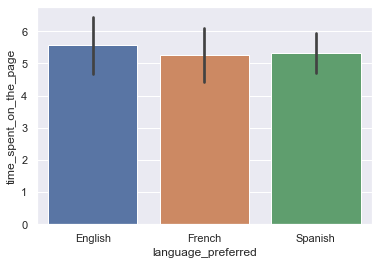

In [66]:
# write the code to visually plot the time spent on the new page for different language users
sns.barplot(x = 'language_preferred', y = 'time_spent_on_the_page', data =abtest)

In [75]:
# write the code to calculate the mean time spent on the new page for different language users
#abtest['time_spent_on_the_page'].columns.mean()
grouped_language = abtest.groupby('language_preferred')
mean_language = grouped_language.mean()
print(mean_language)

                          user_id  time_spent_on_the_page
language_preferred                                       
English             546504.625000                5.559063
French              546516.823529                5.253235
Spanish             546528.823529                5.331765


### Step 1. Define Hypotheses

Null Hypothesis: The mean time spent on the new landing page is the same for all three language preferences.

Alternative Hypothesis: The mean time spent on the new landing page is not the same for all language preferences.

### Step 2. Select Appropriate Test

This is a problem concerning three population means. Based on this we will be using the **ANOVA Test** to compare the three populations means.

 - For testing of normality, the Shapiro-Wilk's test is applied to the response variable.
 - For equality of variance, the Levene test is applied to the response variable.
 
Note: Response is the dependent variable which is continuous and assumed to follow a normal distribution (mean time spent on the new landing page). The factor is the independent explanatory variable with several levels (three different languages).

**Shapiro Wilk's Test**
 - Null Hypothesis: The time spent on the new landing page follows a normal distribution against the alt. hyp.
 - Althernative Hypothesis: The time spent on the new landing page does not follow a normal distribution.

In [45]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(abtest['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since the p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene's Test**

 - Null Hypothesis: All the population variances are equal
 - Alternative Hypothesis: At least one variance is different from the rest.

In [46]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( abtest[abtest['language_preferred']=="English"]['time_spent_on_the_page'], 
                             abtest[abtest['language_preferred']=="French"]['time_spent_on_the_page'], 
                             abtest[abtest['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is larger than the .05 level of significance, we fail to reject the null hypothesis of homogeneity of variances.

In [77]:
#this doesn't seem to be necessary but just looking at the ANOVA example from 3.11, im curious how the coding seems slightly different
#Assumption 2: Homogeneity of Variance
#import the required function
#from scipy.stats import levene
#statistic, p_value = levene( abtest['language_preferred']=="English"]['time_spent_on_the_page'], 
                            # abtest['language_preferred']=="French"]['time_spent_on_the_page'], 
                             #abtest['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
#print('The p-value is', p_value)

### Step 3. Decide Significance Level

As given in the problem statement, we select α = 0.05.

### Step 4. Collect and Prepare Data

In [48]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = abtest[abtest['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French =  abtest[abtest['language_preferred']=="Spanish"]['time_spent_on_the_page']
time_spent_Spanish = abtest[abtest['language_preferred']=="French"]['time_spent_on_the_page']

### Step 5. Calculate P-value

In [49]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_Spanish, time_spent_French)

print('The p-value is', p_value)

The p-value is 0.8665610536012648


### Step 6. Compare the p-value with α

In [50]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7. Draw Inference

**Since the p-value is higher than .05, we cannot reject the null hypothesis that the mean time spent on the new landing page is the same for all three language preferences.**